In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string
from utils import *

%load_ext autoreload

%autoreload 2

In [1]:
def plotMutualInformation(X_train, X_test, y_train):
    f1 = SelectKBest(score_func=mutual_info_regression, k='all')
    f1.fit(X_train, y_train)
    f2 = SelectKBest(score_func=f_regression, k='all')
    f2.fit(X_train, y_train)

    fig, axs = plt.subplots(2)
    fig.set_figheight(8)
    fig.set_figwidth(16)
    axs[0].bar(X_train.columns, f1.scores_)
    axs[0].set_title("Mutual Information")
    axs[1].bar(X_train.columns, f2.scores_)
    axs[1].set_title("F Scores")
    fig.tight_layout()


    print("Mutual Information")
    for i in range(len(f1.scores_)):
        print(f"{X_train.columns[i]}: {f1.scores_[i]}")
    print("___________________________________________")
    print("F Scores")
    for i in range(len(f2.scores_)):
        print(f"{X_train.columns[i]}: {f2.scores_[i]}")

    xtrain = X_train.drop(columns=['cut','depth','table'])
    xtest = X_test.drop(columns=['cut','depth','table'])

    return f1,f2, xtrain, xtest, 

In [3]:
df = loadData()
qdf,ppc = qualtoquan(df)
X_train, X_test, y_train, y_test = scaledTrainTestSplit(qdf)

Mutual Information
carat: 1.6439192106399605
cut: 0.056664431025296835
color: 0.13850287538974015
clarity: 0.21590394365949006
depth: 0.03148082443162181
table: 0.032540825630588355
x: 1.408529145980335
y: 1.4152235296500466
z: 1.3559347272917357
___________________________________________
F Scores
carat: 273187.3379701853
cut: 142.31949610353334
color: 1493.4958775891887
clarity: 1056.5923492880156
depth: 5.154898073035922
table: 806.7281079756091
x: 173670.16962242685
y: 141459.8664821739
z: 137447.7860373874


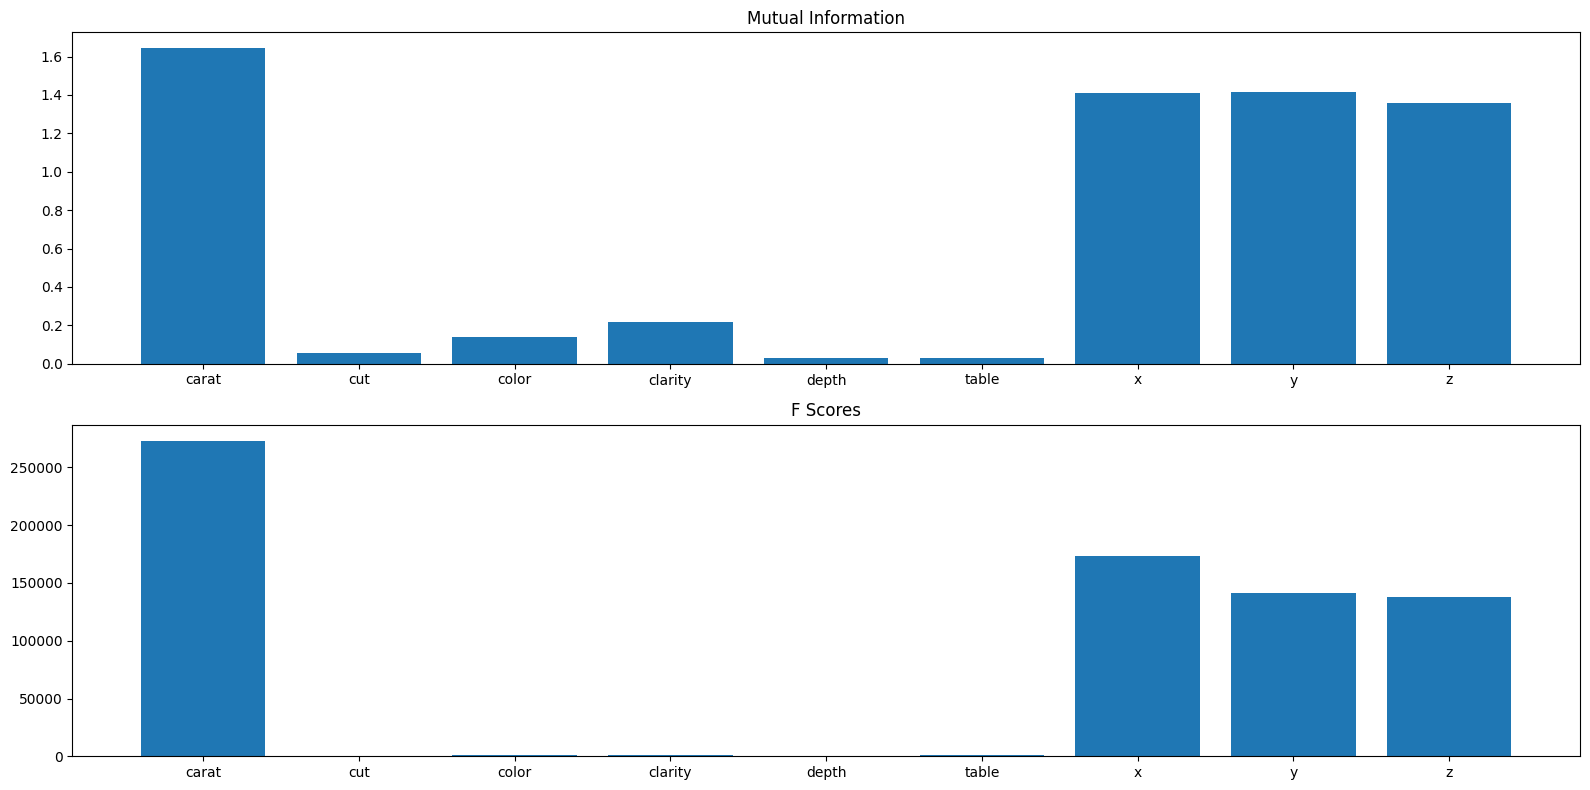

In [20]:
f1,f2, trimX_train, trimX_test = \
    plotMutualInformation(X_train, X_test, y_train)

It is clear by observation that smallest mutual information is present in depth and table. However, it is important to note that cut is also extremely small. 